yo les amis c'est macron et aujourd'hui on va explorer les animés #D4rkSazuke

# Init

In [1]:
# OS and filesystem
from pathlib import Path

# Data
import pandas
import matplotlib.pyplot as pyplot

# Console output
from colorama import Fore, Style

In [2]:
# Filesystem paths
PARENT_FOLDER = Path.cwd()
DATA_FOLDER = (PARENT_FOLDER / ".." / ".." / "data").resolve()

In [11]:
data_anime = pandas.read_csv(DATA_FOLDER / "anime.csv", dtype={"anime_id": int, "name": str, "genre": str, "type": "category", "episodes": str, "rating": float, "members": int})
print(f"{data_anime.shape[0]} rows, {data_anime.shape[1]} columns")
print(data_anime.head(n=5))
print(data_anime.dtypes)

12294 rows, 7 columns
   anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   
3                                   Sci-Fi, Thriller     TV       24    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.16   

   members  
0   200630  
1   793665  
2   114262  
3   673572  
4   151266  
anime_id       int64
name          object
genre         object
type        category
episodes      object
rating       float6

In [9]:
data_ratings = pandas.read_csv(DATA_FOLDER / "rating.csv", dtype={"user_id": int, "anime_id": int, "rating": float})
print(f"{data_ratings.shape[0]} rows, {data_ratings.shape[1]} columns")
print(data_ratings.head(n=5))
print(data_ratings.dtypes)

7813737 rows, 3 columns
   user_id  anime_id  rating
0        1        20    -1.0
1        1        24    -1.0
2        1        79    -1.0
3        1       226    -1.0
4        1       241    -1.0
user_id       int64
anime_id      int64
rating      float64
dtype: object


# Missing values

In [6]:
def missing_values(df, keep_zeros=True):
    data_count = df.shape[0] * df.shape[1]
    missing = missing_df = df.isna().sum()

    if not keep_zeros:
        missing_df = missing_df[missing_df > 0]

    missing_df = missing_df.sort_values(ascending=False).apply(lambda m: f"{m} ({round((m * 100) / df.shape[0], 2)}%)")

    print((
        f"{Style.BRIGHT}Missing values:{Style.RESET_ALL} {round((missing.sum() / data_count) * 100, 2)}%\n"
        f"{Style.DIM}{Fore.WHITE}{missing_df}{Style.RESET_ALL}"
    ))


missing_values(df=data_anime, keep_zeros=True)
missing_values(df=data_ratings, keep_zeros=True)

Missing values: 0.37%
rating      230 (1.87%)
genre         62 (0.5%)
type          25 (0.2%)
anime_id       0 (0.0%)
name           0 (0.0%)
episodes       0 (0.0%)
members        0 (0.0%)
dtype: object
Missing values: 0.0%
user_id     0 (0.0%)
anime_id    0 (0.0%)
rating      0 (0.0%)
dtype: object


# The "episodes" column contains strings

In [ ]:
# TODO

# Frequency of anime based on type of media

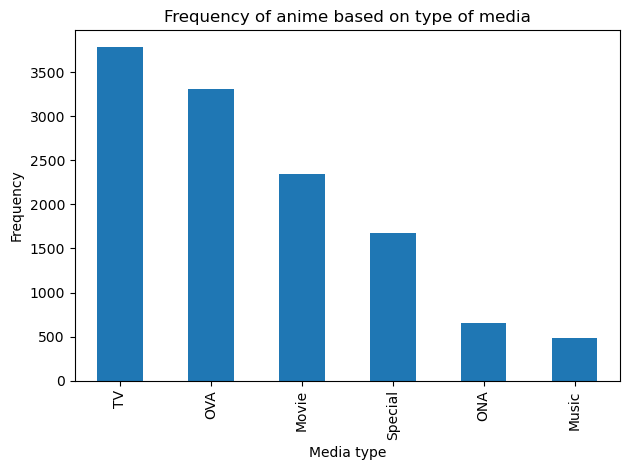

In [20]:
data_anime["type"].value_counts().plot(kind="bar")
pyplot.title("Frequency of anime based on type of media")
pyplot.xlabel("Media type")
pyplot.ylabel("Frequency")
pyplot.tight_layout()
pyplot.show()

# Frequency of anime per genre

In [55]:
"""
genres = data_anime["genre"].str.split(", ", expand=True).stack().to_frame(name="genre")
#genres.index = genres.index.droplevel(1)
genres

genres = genres.groupby("genre").size().reset_index(name="count")
genres
"""

genres = data_anime["genre"].str.split(", ").explode("genre").value_counts()
genres

Comedy           4645
Action           2845
Adventure        2348
Fantasy          2309
Sci-Fi           2070
Drama            2016
Shounen          1712
Kids             1609
Romance          1464
School           1220
Slice of Life    1220
Hentai           1141
Supernatural     1037
Mecha             944
Music             860
Historical        806
Magic             778
Ecchi             637
Shoujo            603
Seinen            547
Sports            543
Mystery           495
Super Power       465
Military          426
Parody            408
Space             381
Horror            369
Harem             317
Demons            294
Martial Arts      265
Dementia          240
Psychological     229
Police            197
Game              181
Samurai           148
Vampire           102
Thriller           87
Cars               72
Shounen Ai         65
Shoujo Ai          55
Josei              54
Yuri               42
Yaoi               39
Name: genre, dtype: int64

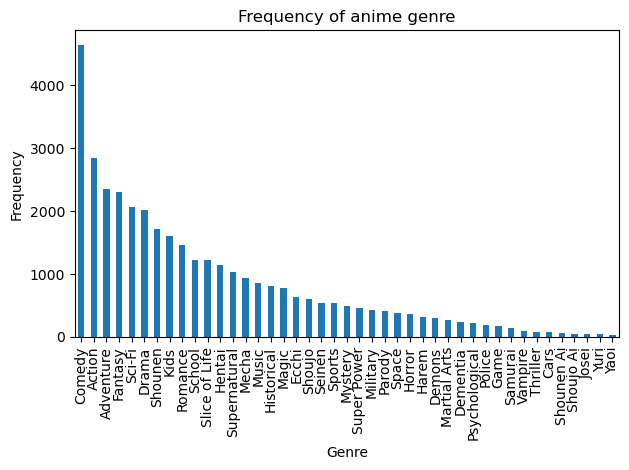

In [57]:
genres.plot(kind="bar")
pyplot.title("Frequency of anime genre")
pyplot.xlabel("Genre")
pyplot.ylabel("Frequency")
pyplot.tight_layout()
pyplot.show()